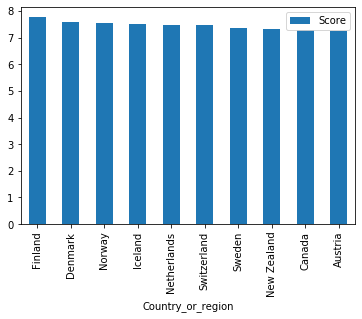

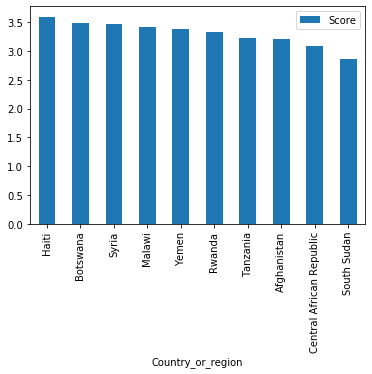

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import ipyleaflet
import json
import pandas as pd
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd
import seaborn as sns


## graphing the top 10 and bottom 10 countries with happiness scores

#reading in dataset
filename ='happiness_2019.csv'
dataset = pd.read_csv(filename)

#graphing
countries = dataset.Country_or_region.unique
ds_top = dataset.head(10)
ds_bottom = dataset.tail(10)
countries_score = dataset[['Country_or_region','Score']].copy()
ds_top.plot.bar(x = 'Country_or_region', y = 'Score')
ds_bottom.plot.bar(x = 'Country_or_region',y = 'Score')

#new dataset for correlation matrix later
new_dataset = pd.DataFrame((dataset[['Score','GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']].copy()))        
                           
                           
                           

In [10]:

#making a chloropleth of happiness scale

import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd



def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#sorting my own dataset
ds = countries_score
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unneeded values to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'Score'])
    ds = ds.append(df2)




# sorting my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','Score'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.Score
score_list = scores.values.tolist()

# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [11]:




#making a chloropleth of GDP per capita
##using same code as above, but for a different category

import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd



def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#my own dataset
countries_GDP = dataset[['Country_or_region','GDP_per_capita']].copy()
ds = countries_GDP
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unnec values in dataset to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'GDP_per_capita'])
    ds = ds.append(df2)




# trying to sort my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','GDP_per_capita'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.GDP_per_capita
score_list = scores.values.tolist()
# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [12]:
#making a chloropleth of perceptions of corruption
##same code as above

import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd


def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#my own dataset
countries_corruption = dataset[['Country_or_region','Perceptions_of_corruption']].copy()
ds = countries_corruption
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unnec values in dataset to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'Perceptions_of_corruption'])
    ds = ds.append(df2)




# trying to sort my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','Perceptions_of_corruption'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.Perceptions_of_corruption
score_list = scores.values.tolist()
# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [13]:


#making a chloropleth of freedom to make life choices
##same code as above


import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd


def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#my own dataset
countries_choices = dataset[['Country_or_region','Freedom_to_make_life_choices']].copy()
ds = countries_choices
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unnec values in dataset to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'Freedom_to_make_life_choices'])
    ds = ds.append(df2)




# trying to sort my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','Freedom_to_make_life_choices'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.Freedom_to_make_life_choices
score_list = scores.values.tolist()
# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [14]:

#making a chloropleth of healthy life expectancy
##same code as above

import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd


def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#my own dataset
countries_life = dataset[['Country_or_region','Healthy_life_expectancy']].copy()
ds = countries_life
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unnec values in dataset to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'Healthy_life_expectancy'])
    ds = ds.append(df2)




# trying to sort my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','Healthy_life_expectancy'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.Healthy_life_expectancy
score_list = scores.values.tolist()
# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [15]:

#making a chloropleth of social support
##same code as above

import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd


def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#my own dataset
countries_supp = dataset[['Country_or_region','Social_support']].copy()
ds = countries_supp
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unnec values in dataset to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'Social_support'])
    ds = ds.append(df2)




# trying to sort my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','Social_support'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.Social_support
score_list = scores.values.tolist()
# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [16]:

#making a chloropleth of generosity
##same code as above

import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import geopandas as gpd


def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

# loading in json data
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json',
    'countries.geo.json',
     json.load)

# creating a list of countries with the full name
fullcountry_id = []
for i in range(len(geo_json_data['features'])):
             fullcountry_id.append(geo_json_data['features'][i]['properties']['name'])


#creating list of countries short codes
country_id = []
for j in range(len(geo_json_data['features'])):
             country_id.append(geo_json_data['features'][j]['id'])

        
#my own dataset
countries_gen = dataset[['Country_or_region','Generosity']].copy()
ds = countries_gen
sorted_countries = ds.sort_values('Country_or_region')
country_names = sorted_countries.Country_or_region.values.tolist()

        
#json data of short and full names of 180 countries
combined_dict = {fullcountry_id[i]: country_id[i] for i in range(len(fullcountry_id))} 

#figuring out which ones to add to my own dataset
need_add = []
for key in combined_dict:
    if key not in country_names:
        need_add.append(key)

        
        
#dropping unnec values in dataset to match json file
copy = country_names.copy()
need_remove = []
for k in range(len(country_names)):
    if copy[k] not in combined_dict:
        country_names.remove(copy[k])
        need_remove.append(copy[k])
dropped = []
for l in range(len(need_remove)):
    index = np.where(ds.Country_or_region==need_remove[l])
    dropped.append(int((index[0][0])))

for r in range(len(dropped)):
    ds = ds.drop(dropped[r])


#adding rows to match json file
for m in range(len(need_add)):
    df2 = pd.DataFrame([[need_add[m],0]], columns=['Country_or_region', 'Generosity'])
    ds = ds.append(df2)




# trying to sort my own dataset to match json file
ds = ds.sort_values('Country_or_region')


indexlist = []
for n in range(len(fullcountry_id)):
    rawindex = np.where(ds.Country_or_region == fullcountry_id[n])
    indexlist.append(rawindex[0][0])
    
indexlist

newds = pd.DataFrame(columns = ['Country_or_region','Generosity'])
for o in range(len(indexlist)):
    row = ds.iloc[indexlist[o]:(indexlist[o] + 1)]
    newds = pd.concat([newds,row])
    
newds = newds.reset_index()
newds = newds.drop('index',axis = 1)


scores = newds.Generosity
score_list = scores.values.tolist()
# score_list
choro_dict = {country_id[i]: score_list[i] for i in range(len(country_id))} 
     
#creating the chloropleth
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=choro_dict,
    colormap=linear.YlGnBu_09,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [17]:

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, reset_output, output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


# naming output html file
output_file('datavis_scatterplot_happiness_GDP.html')
# Import the data
GDP_Score = dataset[['Country_or_region','Score','GDP_per_capita']].copy()



# Store the data in a ColumnDataSource
three_takers_cds = ColumnDataSource(GDP_Score)

#Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Format the tooltip
tooltips = [
            ('Country', '@Country_or_region'),
            ('Score', '@Score'),
            ('GDP', '@GDP_per_capita'),
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=600,
             x_axis_label='GDP Per Capita',
             y_axis_label='Happiness Score',
             title='GDP Per Capita versus Happiness Score for Countries',
             toolbar_location='below',
             tools=select_tools)


# Add square representing each player
fig.square(x='GDP_per_capita',
           y='Score',
           source=GDP_Score,
           color='magenta',
           selection_color='purple',
           nonselection_color='magenta',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

In [18]:

#same code as above but for healthy life expectancy

# Import the data
life_Score = dataset[['Country_or_region','Score','Healthy_life_expectancy']].copy()



# Output to file
output_file('health.html')

# Store the data in a ColumnDataSource
three_takers_cds = ColumnDataSource(life_Score)

#Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Format the tooltip
tooltips = [
            ('Country', '@Country_or_region'),
            ('Score', '@Score'),
            ('Healthy Life Expectancy', '@Healthy_life_expectancy'),
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=600,
             x_axis_label='Healthy Life Expectancy',
             y_axis_label='Happiness Score',
             title='Healthy Life Expectancy versus Happiness Score for Countries',
             toolbar_location='below',
             tools=select_tools)


# Add square representing each player
fig.square(x='Healthy_life_expectancy',
           y='Score',
           source=life_Score,
           color='magenta',
           selection_color='purple',
           nonselection_color='magenta',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

In [87]:
##same code as above but for generosity
# Import the data
gen_Score = dataset[['Country_or_region','Score','Generosity']].copy()



# Output to file

output_file('test2.html')
# Store the data in a ColumnDataSource
three_takers_cds = ColumnDataSource(gen_Score)

#Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Format the tooltip
tooltips = [
            ('Country', '@Country_or_region'),
            ('Score', '@Score'),
            ('Generosity', '@Generosity'),
           ]

# Create the figure
fig = figure(plot_height=400,
             plot_width=600,
             x_axis_label='Generosity',
             y_axis_label='Happiness Score',
             title='Generosity versus Happiness Score for Countries',
             toolbar_location='below',
             tools=select_tools)


# Add square representing each player
fig.square(x='Generosity',
           y='Score',
           source=gen_Score,
           color='magenta',
           selection_color='purple',
           nonselection_color='magenta',
           nonselection_alpha=0.3)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))

# Visualize
show(fig)

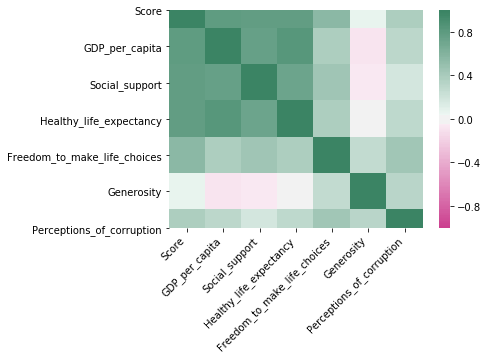

In [97]:
#making a correlation plot for the different variables in 2019
print()
print()
#loading in dataset
data = new_dataset

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-20, 150, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

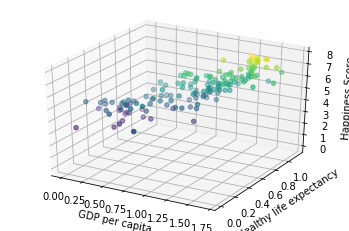

In [96]:
#creating 3d scatterplot
#for healthy life expectancy, GDP, and happiness

from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt



#initiating 3d figure
fig = plt.figure()
ax = plt.axes(projection="3d")

#creating dimension sizes
z_line = np.linspace(0, 10, 1)
x_line = (z_line)
y_line = (z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

#creating dimension labels and data
z_points = dataset['Score']
ax.set_zlabel('Happiness Score')
x_points = dataset['GDP_per_capita']
ax.set_xlabel('GDP per capita')
y_points = dataset['Healthy_life_expectancy']
ax.set_ylabel('Healthy life expectancy')
ax.scatter3D(x_points, y_points, z_points, c=z_points);

#show plot
plt.show()
print()
print()

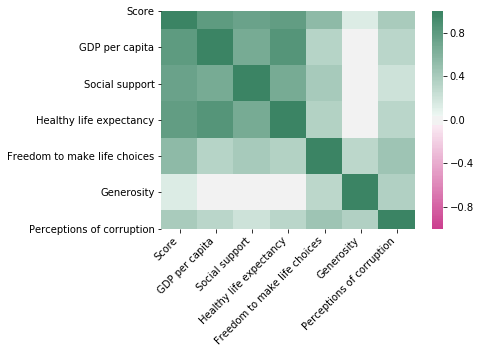

In [89]:
print()
print()
# 2018 data to make a correlation plot
dataset_2018 = pd.read_csv('2018.csv')
#making a correlation plot for the different variables
new_dataset_2018 = pd.DataFrame((dataset_2018[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy()))

data = new_dataset_2018

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-20, 150, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




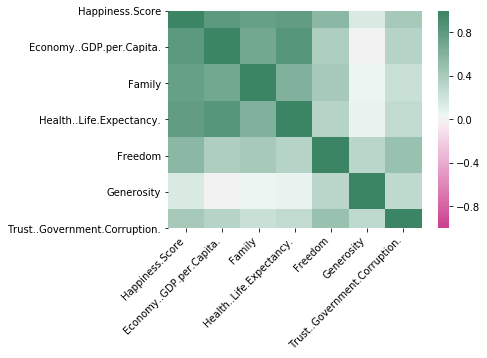

In [71]:
dataset_2017 = pd.read_csv('2017.csv')
#making a correlation plot for the different variables in 2017
new_dataset_2017 = pd.DataFrame((dataset_2017[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom','Generosity','Trust..Government.Corruption.']].copy()))

data = new_dataset_2017

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-20, 150, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


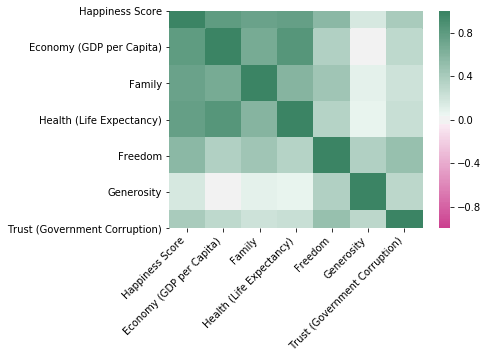

In [90]:
print()
print()
dataset_2016 = pd.read_csv('2016.csv')
#making a correlation plot for the different variables in 2016
new_dataset_2016 = pd.DataFrame((dataset_2016[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)']].copy()))

data = new_dataset_2016

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-20, 150, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


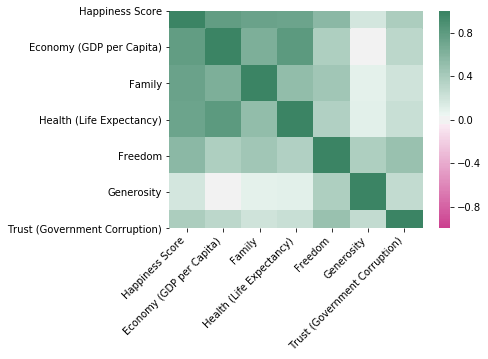

In [8]:
print()
print()
dataset_2015 = pd.read_csv('2015.csv')
#making a correlation plot for the different variables in 2015
new_dataset_2015 = pd.DataFrame((dataset_2015[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)']].copy()))

data = new_dataset_2015

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(-20, 150, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
